# 10. 시각화
## 10.2 차원 축소 기법

In [1]:
from sklearn.manifold import TSNE
import numpy as np
from matplotlib import pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd/content/gdrive/My Drive/pytorch_dlbro

/content/gdrive/My Drive/pytorch_dlbro


In [2]:
# GPU vs CPU
# 현재 가능한 장치를 확인한다.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16)

100%|██████████| 170498071/170498071 [17:59<00:00, 157918.18it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data


In [4]:
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()

    def forward(self, x):
        return x

In [5]:
model = torchvision.models.resnet18(pretrained=False)
model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
model = model.to(device)

c:\Users\user\mambaforge\envs\tf_gpu\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\user\mambaforge\envs\tf_gpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [6]:
model.load_state_dict(torch.load('./models/cifar10_resnet18.pth'))
model.fc = Identity()

In [7]:
actual = []
deep_features = []
model.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        features = model(images)
        deep_features += features.cpu().tolist()
        actual += labels.cpu().tolist()

### t-SNE

In [27]:
tsne = TSNE(n_components=2, random_state=0, perplexity=50.0)
cluster = np.array(tsne.fit_transform(np.array(deep_features)))
actual = np.array(actual)

perplexity=50.0

In [28]:
print(cluster)

[[ 48.103943  17.5914  ]
 [-49.4055   -16.39374 ]
 [-51.951763 -19.03361 ]
 ...
 [ 55.974026 -28.945892]
 [-26.19618   44.730324]
 [ 12.854018 -56.413376]]


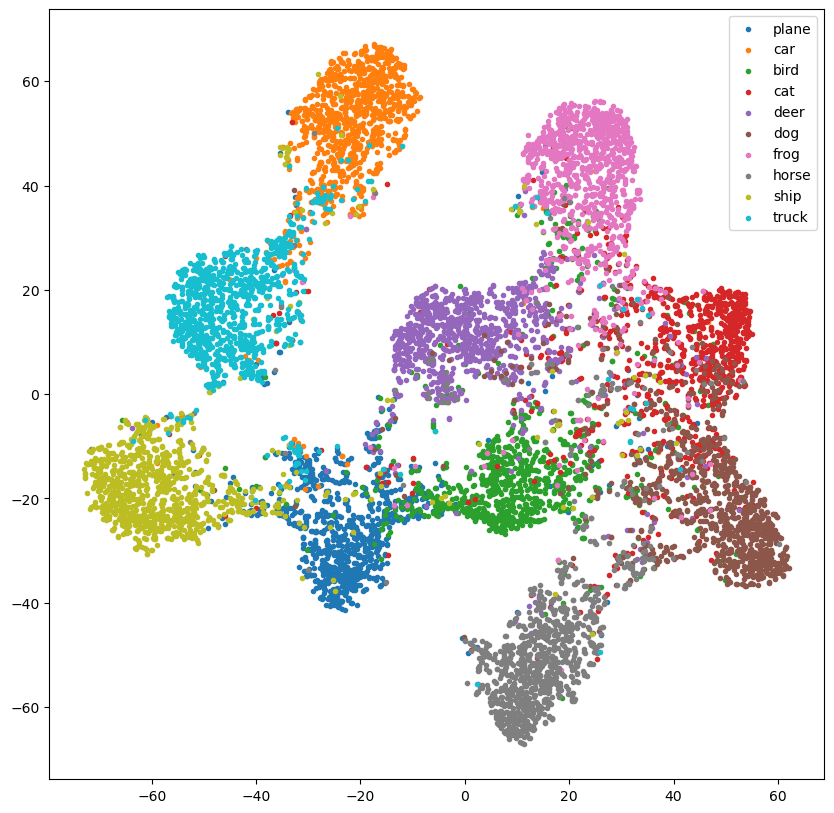

In [29]:
plt.figure(figsize=(10, 10))
cifar = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i, label in zip(range(10), cifar):
    idx = np.where(actual == i)
    plt.scatter(cluster[idx, 0], cluster[idx, 1], marker='.', label=label)
plt.legend()
plt.show()

perplexity = 30.0

In [ ]:
print(cluster)

[[ 39.81542    25.498327 ]
 [-24.123224  -51.39916  ]
 [-32.378666  -55.0456   ]
 ...
 [ 42.74918   -37.94185  ]
 [-61.04587    24.473726 ]
 [ 83.01733     8.7004595]]


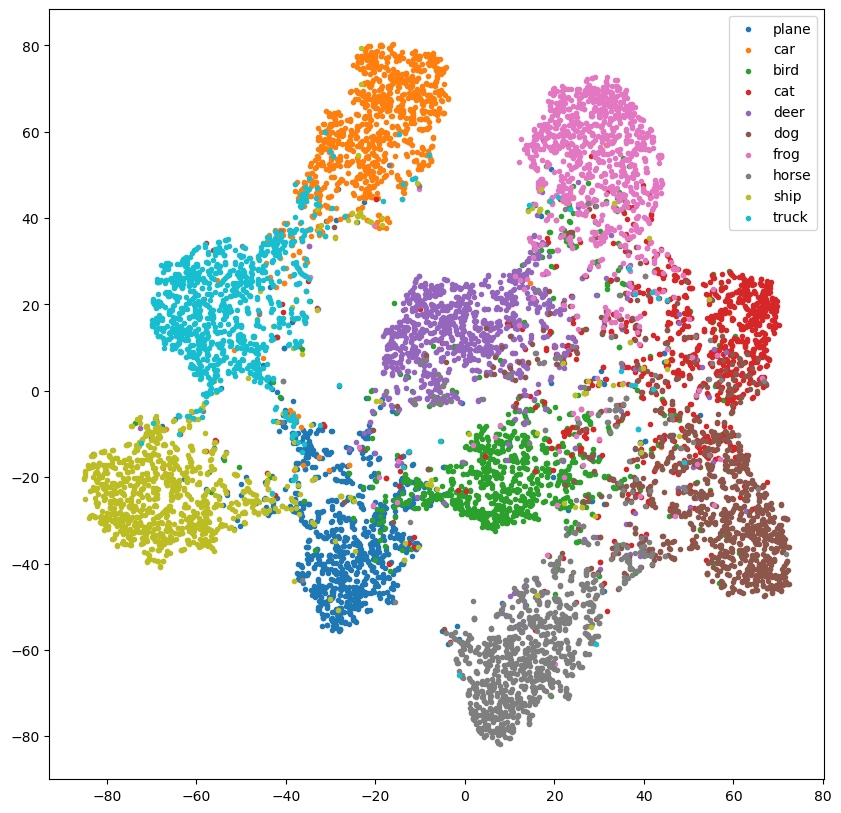

In [19]:
plt.figure(figsize=(10, 10))
cifar = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i, label in zip(range(10), cifar):
    idx = np.where(actual == i)
    plt.scatter(cluster[idx, 0], cluster[idx, 1], marker='.', label=label)
plt.legend()
plt.show()

perplexity = 20.0

In [16]:
cluster

array([[ 68.99687 ,  25.777637],
       [-71.12241 ,  -8.299965],
       [-61.268223, -23.561548],
       ...,
       [ 70.240845, -46.80697 ],
       [-30.99931 ,  57.22607 ],
       [ 14.647259, -72.56896 ]], dtype=float32)

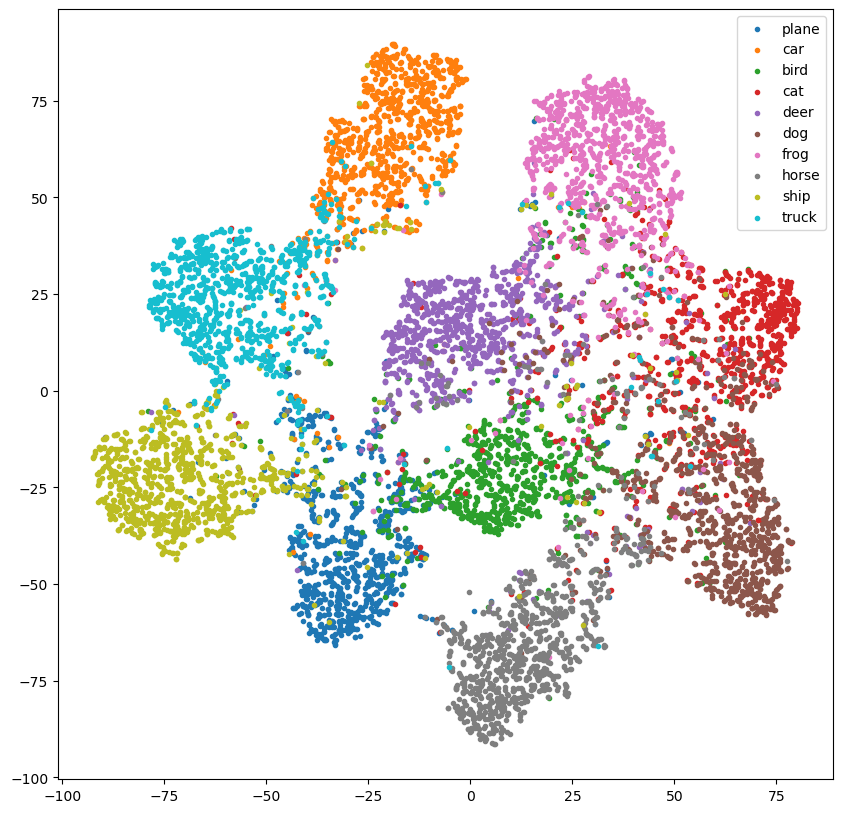

In [17]:
plt.figure(figsize=(10, 10))
cifar = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i, label in zip(range(10), cifar):
    idx = np.where(actual == i)
    plt.scatter(cluster[idx, 0], cluster[idx, 1], marker='.', label=label)
plt.legend()
plt.show()

perplexity = 10.0

In [13]:
cluster

array([[ 77.10715  ,  27.581064 ],
       [-71.96104  ,  -5.8533983],
       [-62.63697  , -24.885923 ],
       ...,
       [ 57.96243  , -62.232807 ],
       [-37.48054  ,  65.31174  ],
       [ 17.682522 , -76.84595  ]], dtype=float32)

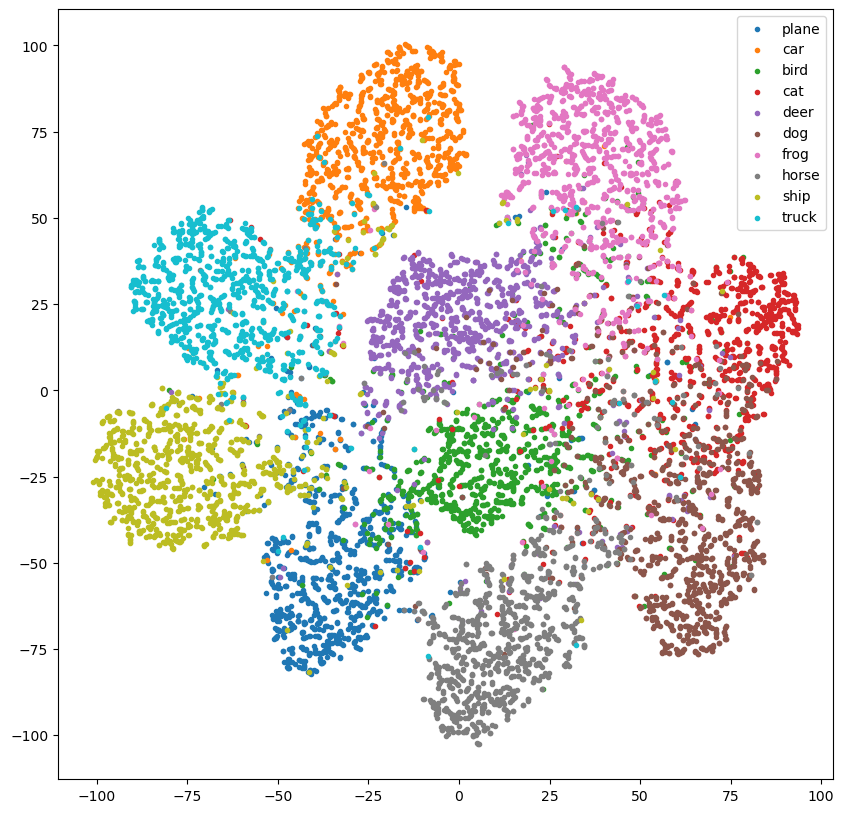

In [14]:
plt.figure(figsize=(10, 10))
cifar = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i, label in zip(range(10), cifar):
    idx = np.where(actual == i)
    plt.scatter(cluster[idx, 0], cluster[idx, 1], marker='.', label=label)
plt.legend()
plt.show()

perplexity = 5.0

In [11]:
cluster

array([[ 85.607056,  32.142044],
       [-55.137047, -19.940962],
       [-58.369476, -23.578974],
       ...,
       [ 57.206875, -62.62922 ],
       [-40.72947 ,  57.215317],
       [ 11.863623, -73.25474 ]], dtype=float32)

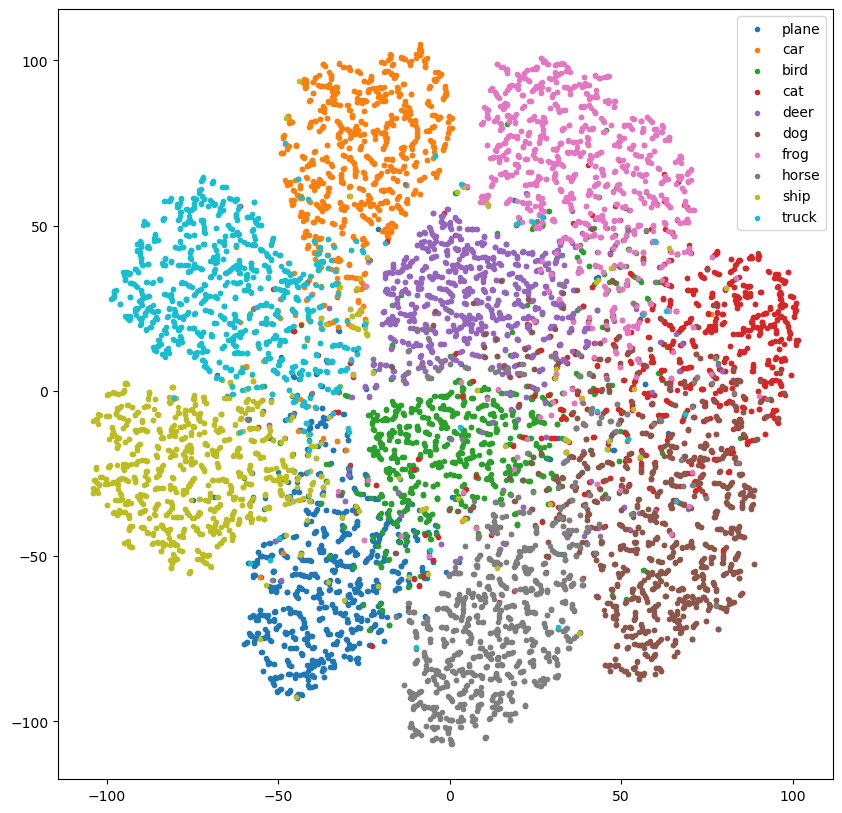

In [10]:
plt.figure(figsize=(10, 10))
cifar = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i, label in zip(range(10), cifar):
    idx = np.where(actual == i)
    plt.scatter(cluster[idx, 0], cluster[idx, 1], marker='.', label=label)
plt.legend()
plt.show()

### Principal component analysis (PCA)

In [20]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components=30, random_state=0)
cluster = np.array(pca.fit_transform(np.array(deep_features)))

In [ ]:
print(pca.explained_variance_ratio_)

[0.20507801 0.15242793]


n_components=2

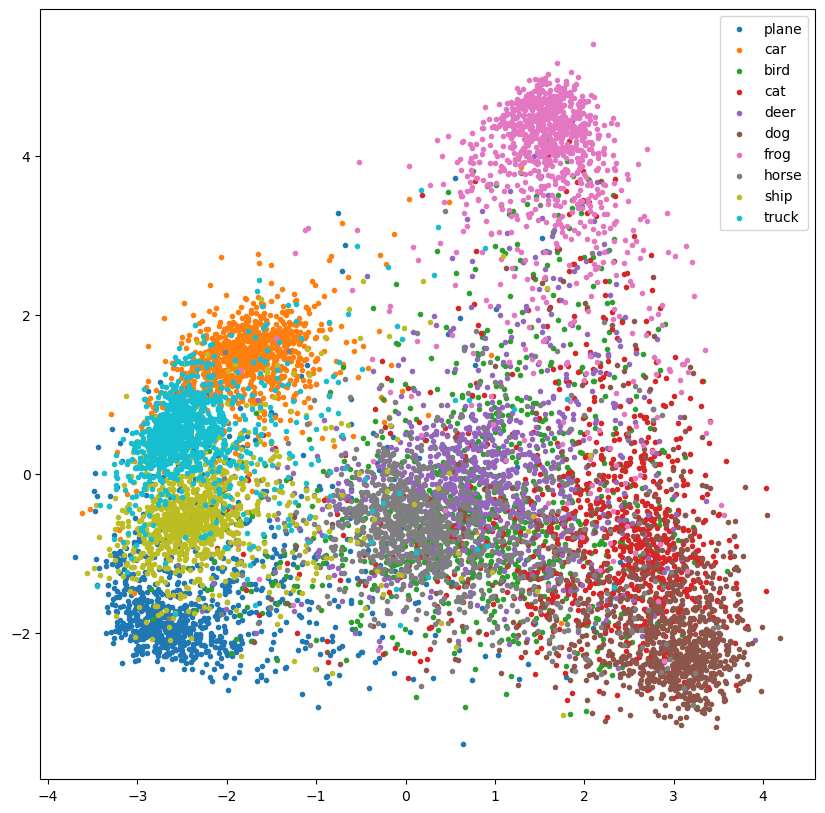

In [22]:
plt.figure(figsize=(10, 10))
cifar = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i, label in zip(range(10), cifar):
    idx = np.where(actual == i)
    plt.scatter(cluster[idx, 0], cluster[idx, 1], marker='.', label=label)
plt.legend()
plt.show()

n_components=10

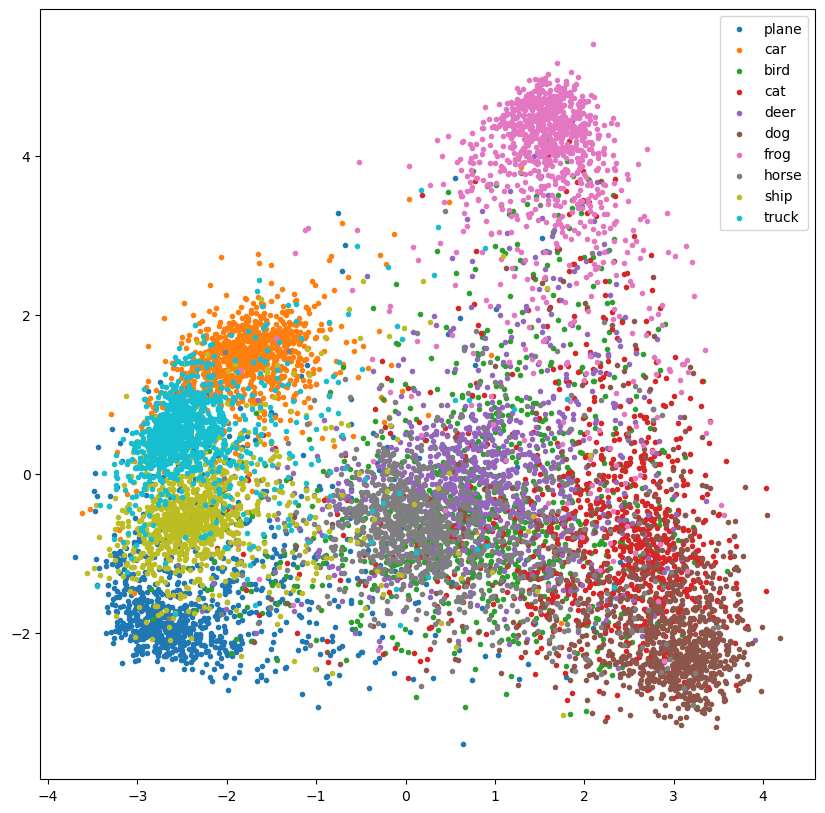

In [24]:
plt.figure(figsize=(10, 10))
cifar = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i, label in zip(range(10), cifar):
    idx = np.where(actual == i)
    plt.scatter(cluster[idx, 0], cluster[idx, 1], marker='.', label=label)
plt.legend()
plt.show()

n_components=30

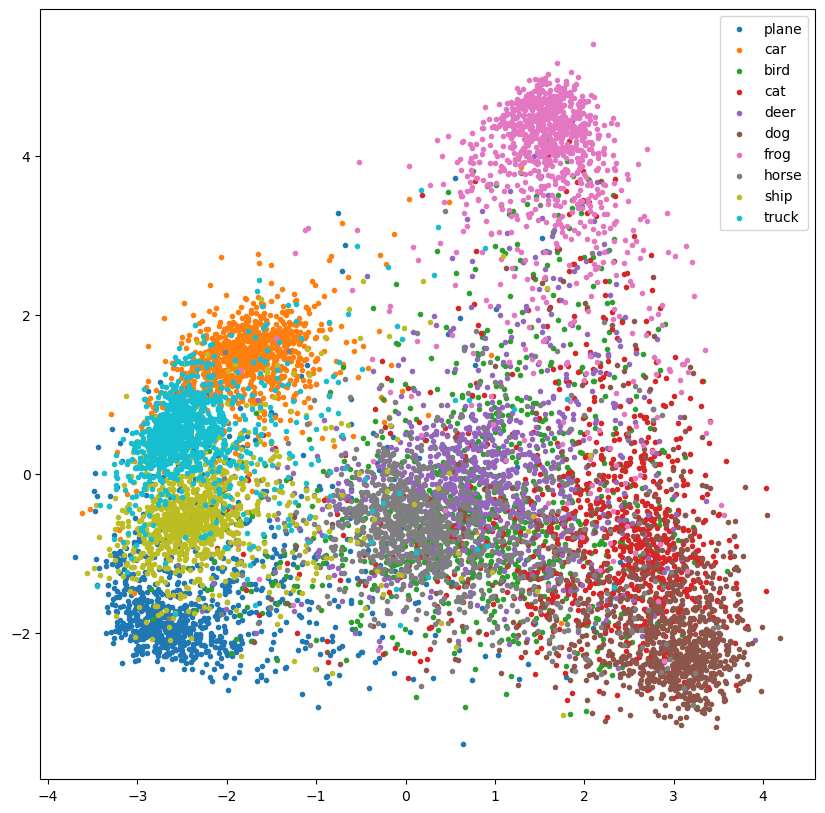

In [26]:
plt.figure(figsize=(10, 10))
cifar = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i, label in zip(range(10), cifar):
    idx = np.where(actual == i)
    plt.scatter(cluster[idx, 0], cluster[idx, 1], marker='.', label=label)
plt.legend()
plt.show()